1. Data Preparation and Exploration:
- Load the `movies.csv` and `reviews.csv` datasets into pandas dataframes.
- Display summary statistics and the first few rows of each dataframe to understand their structure.


In [1]:
import pandas as pd # import

# load the datasets
movies = pd.read_csv('movies.csv')
reviews = pd.read_csv('reviews.csv')

In [4]:
movies.head(5)

,movie_id,title,genre,release_year
0,1,The Shawshank Redemption,Drama,1999
1,2,The Godfather,Drama,1987
2,3,The Dark Knight,Drama,1993
3,4,Schindler's List,Crime,2002
4,5,Pulp Fiction,Action,1980


In [5]:
reviews.head(5)

,review_id,movie_id,reviewer,rating,review_date
0,1,96,Jane Doe,8.0,2020-02-17
1,2,90,Victor Scott,1.8,2020-08-22
2,3,32,Yara Baker,1.8,2020-03-10
3,4,77,Victor Scott,5.2,2020-04-24
4,5,16,Mia Martinez,6.3,2020-04-13


In [6]:
movies.describe()

,movie_id,release_year
count,100.000000,100.000000
mean,50.500000,2001.670000
std,29.011492,13.758417
min,1.000000,1980.000000
25%,25.750000,1988.000000
50%,50.500000,2001.500000
75%,75.250000,2014.250000
max,100.000000,2023.000000


In [7]:
reviews.describe()

,review_id,movie_id,rating
count,300.000000,300.00000,300.000000
mean,150.500000,52.99000,5.328333
std,86.746758,27.98835,2.580354
min,1.000000,1.00000,1.000000
25%,75.750000,29.75000,3.000000
50%,150.500000,54.00000,5.200000
75%,225.250000,76.25000,7.400000
max,300.000000,100.00000,10.000000


2. Highest Rated Movies:
- Perform an inner join on the `movies` and `reviews` dataframes based on the `movie_id` column.
- Calculate the average rating for each movie.
- Identify the top 10 highest-rated movies.
- Display the titles and average ratings of these top 10 movies.


In [10]:
# example = pd.merge(left, right, how="inner", on=["key1", "key2"]) from: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merge
movies_reviews = pd.merge(movies, reviews, how='inner', on = 'movie_id')
movies_reviews.head(10) # # Making sure everything is correct

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12
5,4,Schindler's List,Crime,2002,140,Yara Baker,7.1,2020-05-13
6,4,Schindler's List,Crime,2002,208,Olivia Clark,2.5,2020-05-09
7,6,The Lord of the Rings: The Return of the King,Crime,2010,20,Bob Brown,1.2,2020-02-08
8,6,The Lord of the Rings: The Return of the King,Crime,2010,41,Henry Harris,1.5,2020-10-17
9,6,The Lord of the Rings: The Return of the King,Crime,2010,46,Jane Doe,7.5,2020-07-31


In [19]:
# top 10 : https://stackoverflow.com/questions/43859416/finding-top-10-in-a-dataframe-in-pandas
# DataFrame.nlargest(n, columns, keep='first') : https://pandas.pydata.org/pandas-docs/version/0.23.0/generated/pandas.DataFrame.nlargest.html
movies_reviews.groupby('title')['rating'].mean().nlargest(10)

title
The Dark Knight            9.800
Vertigo                    9.350
City Lights                9.250
Jaws                       8.600
Grave of the Fireflies     8.000
Scarface                   8.000
The Empire Strikes Back    8.000
North by Northwest         7.650
A Beautiful Mind           7.625
Oldboy                     7.500
Name: rating, dtype: float64

In [26]:
# The transform() method allows you to execute a function for each value of the DataFrame: https://www.w3schools.com/python/pandas/ref_df_transform.asp
movies_reviews['average_rating'] = movies_reviews.groupby('movie_id')['rating'].transform('mean') # I wanted to create a hole new role of average_rating for each movie
movies_reviews.head(10)

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date,average_rating
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04,7.45
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23,7.45
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27,7.45
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17,7.45
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12,9.80
5,4,Schindler's List,Crime,2002,140,Yara Baker,7.1,2020-05-13,4.80
6,4,Schindler's List,Crime,2002,208,Olivia Clark,2.5,2020-05-09,4.80
7,6,The Lord of the Rings: The Return of the King,Crime,2010,20,Bob Brown,1.2,2020-02-08,4.48
8,6,The Lord of the Rings: The Return of the King,Crime,2010,41,Henry Harris,1.5,2020-10-17,4.48
9,6,The Lord of the Rings: The Return of the King,Crime,2010,46,Jane Doe,7.5,2020-07-31,4.48


<Axes: title={'center': 'Top 10 Movies'}, xlabel='Average Rating', ylabel='Movies'>

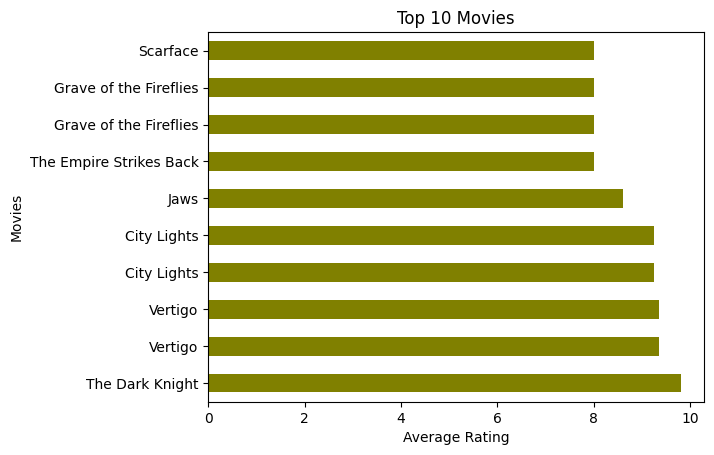

In [58]:
top_10_movies = movies_reviews.nlargest(10, 'average_rating')
top_10_movies.plot(x='title', y='average_rating', kind='barh', color='olive', title='Top 10 Movies', legend=False, ylabel='Movies', xlabel='Average Rating',)

3. Genre Analysis:
- Group the joined dataframe by `genre` and calculate the average rating for each genre.
- Determine which genre has the highest average rating.
- Display the genres along with their average ratings.
